In [1]:
from agrifoodpy.land.land import CEH_5000 as CEH

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches

In [2]:
# Yorkshire = 66
border_file = 'bdline_gb.gpkg'
fiona.listlayers(border_file)

['boundary_line_ceremonial_counties',
 'boundary_line_historic_counties',
 'community_ward',
 'country_region',
 'county',
 'county_electoral_division',
 'district_borough_unitary',
 'district_borough_unitary_ward',
 'english_region',
 'greater_london_const',
 'high_water',
 'historic_european_region',
 'parish',
 'polling_districts_england',
 'scotland_and_wales_const',
 'scotland_and_wales_region',
 'unitary_electoral_division',
 'westminster_const']

In [3]:
countries = gpd.read_file(border_file, layer='country_region')
countries

,Name,Area_Code,Area_Description,File_Name,Feature_Serial_Number,Collection_Serial_Number,Global_Polygon_ID,Admin_Unit_ID,Census_Code,Hectares,Non_Inland_Area,Area_Type_Code,Area_Type_Description,Non_Area_Type_Code,Non_Area_Type_Description,geometry
0,Scotland,CY,Country,SCOTLAND_COUNTRY,1,1,99606,41429,S92000003,11.492,5.291,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((181768.997 730117.995, 181760...."
1,Scotland,CY,Country,SCOTLAND_COUNTRY,2,2,99520,41429,S92000003,9.959,3.567,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((177717.003 735018.503, 177713...."
2,Scotland,CY,Country,SCOTLAND_COUNTRY,3,3,99441,41429,S92000003,16.238,5.779,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((182949.599 738044.297, 182953...."
3,Scotland,CY,Country,SCOTLAND_COUNTRY,1142,1142,139191,41429,S92000003,778.082,74.029,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((121271.199 897482.098, 121282...."
4,Scotland,CY,Country,SCOTLAND_COUNTRY,4,4,99450,41429,S92000003,16.721,7.349,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((183539.500 738004.498, 183535...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Scotland,CY,Country,SCOTLAND_COUNTRY,2736,2736,139088,41429,S92000003,0.515,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((74807.897 876917.404, 74804.59..."
2728,Scotland,CY,Country,SCOTLAND_COUNTRY,2737,2737,139089,41429,S92000003,6.831,1.479,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((112989.497 933457.500, 112994...."
2729,Scotland,CY,Country,SCOTLAND_COUNTRY,2738,2738,139090,41429,S92000003,2.451,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((93522.001 876915.495, 93529.99..."
2730,Scotland,CY,Country,SCOTLAND_COUNTRY,2739,2739,139091,41429,S92000003,0.449,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((75062.496 876859.301, 75058.59..."


In [4]:
CEH

<xarray.Dataset>
Dimensions:  (Type: 11, x: 131, y: 243)
Coordinates:
  * x        (x) float64 7.996e+03 1.296e+04 1.793e+04 ... 6.485e+05 6.535e+05
  * y        (y) float64 7.834e+03 1.283e+04 1.783e+04 ... 1.213e+06 1.218e+06
  * Type     (Type) object 'be' 'fb' 'gr' 'ma' 'or' ... 'po' 'sb' 'sw' 'wb' 'ww'
Data variables:
    area     (Type, x, y) float64 ...

In [5]:
# plt.figure(figsize=(10,10))
ww = CEH.area.sel(Type="gr")
# ax.imshow(ww.T, interpolation='none', origin="lower")

In [6]:
gr = CEH.area.sel(Type='gr')
ww = CEH.area.sel(Type='ww')
other = CEH.area.sel(Type=['be', 'fb', 'ma', 'or', 'ot', 'po', 'sb', 'sw', 'wb',])
max_other = other.max(dim="Type")

max_other

<xarray.DataArray 'area' (x: 131, y: 243)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x        (x) float64 7.996e+03 1.296e+04 1.793e+04 ... 6.485e+05 6.535e+05
  * y        (y) float64 7.834e+03 1.283e+04 1.783e+04 ... 1.213e+06 1.218e+06

In [7]:
pos_gr = np.where(gr > ww)
pos_ww = np.where(gr < ww)
pos_other = np.where((max_other > ww) & (max_other > gr))
pos_gr

(array([ 26,  26,  28, ..., 130, 130, 130]),
 array([ 3,  4,  5, ..., 57, 59, 60]))

In [8]:
map_ww_gr = np.zeros_like(gr)*np.nan
for x, y in zip(pos_gr[0], pos_gr[1]):
    map_ww_gr[x,y] = 10
    

for x, y in zip(pos_ww[0], pos_ww[1]):
    map_ww_gr[x,y] = 1

    
for x, y in zip(pos_other[0], pos_other[1]):
    map_ww_gr[x,y] = np.nan
    

values = np.unique(map_ww_gr.ravel())

In [9]:
values

array([ 1., 10., nan])

In [10]:
trans = mtransforms.Affine2D().scale(6000, 6000)

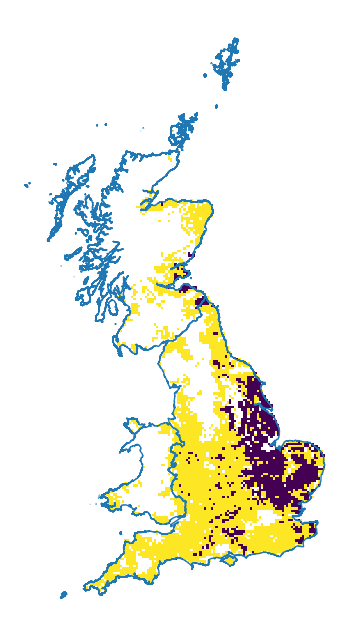

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10,8))

ax.imshow(map_ww_gr.T, origin='lower', interpolation='none', extent=[8000, 6.55e5, 8000, 1.22e6])
countries.boundary.plot(ax=ax, linewidth=1)
ax.axis("off")

# ax.set_xlim(0,500)
# ax.set_ylim(0,500)

# labels = ["wheat", "grass", ""]
# colors = [ im.cmap(im.norm(value)) for value in values]
# # create a patch (proxy artist) for every color 
# patches = [ mpatches.Patch(color=colors[i], label=labels[i] ) for i in range(len(values)) ]
# # put those patched as legend-handles into the legend
# ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.savefig("england_grass_wheat.png", transparent=True, dpi=200)

In [12]:
countries.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich